In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## 의사결정트리
* 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석기법
* 기회비용에 대한 고려, 기대 이익 계산, 위험 관리등 효율적인 결정이 필요한 많은 분야에 사용되고 있음
* 의사결정트리는 회귀,분류에 사용되지만 주로 분류에 많이 이용되고 있음

### iris 데이터셋을 이용한 분석

In [3]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, train_size=0.75,
                random_state=2309251055, stratify=iris.target)

In [30]:
# 의사결정나무 분석
dtclf = DecisionTreeClassifier(criterion='entropy', # 지정하지 않으면 기본값은 gini임
                               random_state=2309251055, max_depth=4)  # max_depth : 과적합 규제
dtclf.fit(X_train, y_train)

dtclf.score(X_train, y_train)

0.9910714285714286

In [31]:
pred = dtclf.predict(X_test)
accuracy_score(pred, y_test)

0.9210526315789473

In [32]:
confusion_matrix(pred, y_test)

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 11]])

### 의사결정나무 시각화
* 출력하려면 graphviz라는 라이브러리 필요!
     + graphviz.org => stable 2.49.3 windows => graphviz-2.49.3.zip
         + c:/Java 아래에 압축 해제 
         + 폴더명은 graphviz-2.49.3
         + bin 폴더를 PATH 환경변수로 등록
     + 리눅스는 yum install -y graphviz 또는 apt-get install -y graphviz
     + 맥은 brew install graphviz
* 파이썬 pydotplus 패키지도 필요함   

In [8]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pydotplus
from sklearn import tree

In [33]:
# feature_names : 의사결정 나무 시각화시 특성 이름 지정
# class_names : 의사결정 나무 시각화시 분류결과 이름 지정
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('./img/tree_iris.png')

True

In [20]:
import matplotlib.image as pltimg

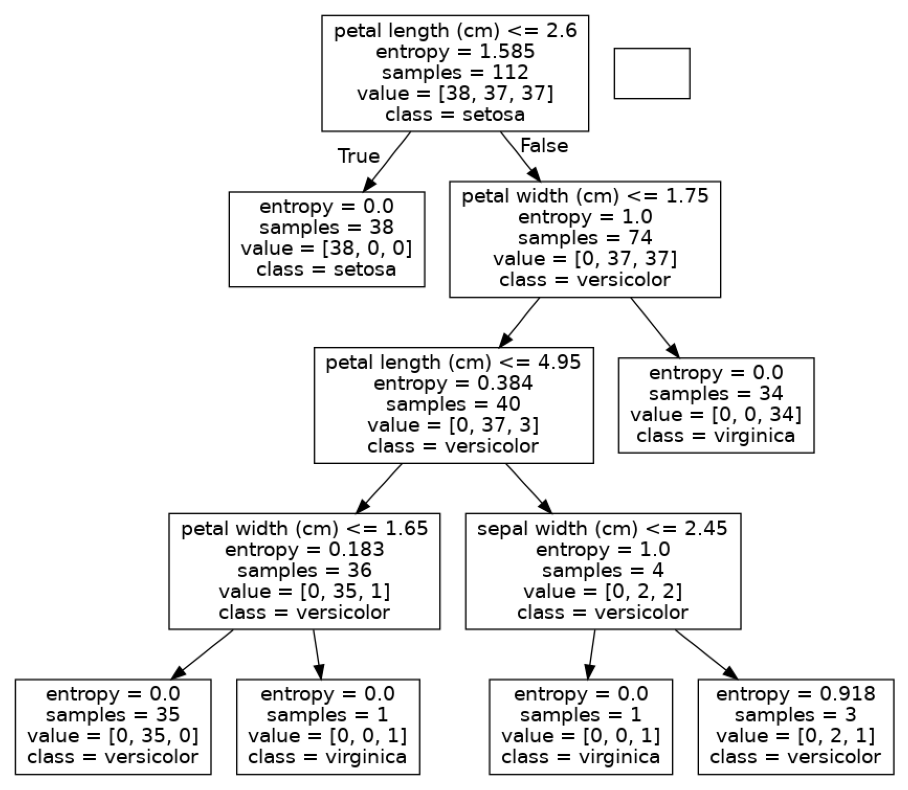

In [34]:
img = pltimg.imread('./img/tree_iris.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()

### 변수별 중요도

In [35]:
dtclf.feature_importances_

array([0.        , 0.00712519, 0.61965219, 0.37322262])

### 타이타닉 승객 생존여부 분석

In [48]:
titanic = pd.read_csv('titanic3.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titles       1306 non-null   int64  
 1   age          1306 non-null   float64
 2   sibsp        1306 non-null   float64
 3   parch        1306 non-null   float64
 4   fare         1306 non-null   float64
 5   gender       1306 non-null   int64  
 6   embark_town  1306 non-null   int64  
 7   pclass       1306 non-null   int64  
 8   survived     1306 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 92.0 KB


In [50]:
# data, target으로 나눔
data = titanic.iloc[:, :8]
target = titanic.survived
X_train, X_test, y_train, y_test= train_test_split(data, target, train_size=0.75,
                random_state=2309251150, stratify=target)

In [51]:
# 의사결정나무 분석
dtclf = DecisionTreeClassifier(criterion='entropy', # 지정하지 않으면 기본값은 gini임
                                max_depth=5)  # max_depth : 과적합 규제
dtclf.fit(X_train, y_train)

dtclf.score(X_train, y_train)

0.8314606741573034

In [54]:
pred = dtclf.predict(X_test)
accuracy_score(y_test, pred)

0.7920489296636085

In [55]:
confusion_matrix(y_test, pred)

array([[167,  35],
       [ 33,  92]])

In [56]:
precision_score(y_test, pred), recall_score(y_test, pred)

(0.7244094488188977, 0.736)

In [57]:
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=data.columns)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('./img/tree_titanic.png')

True

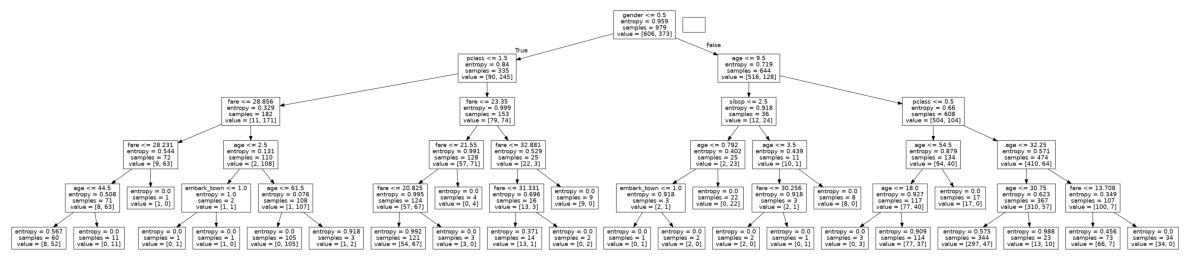

In [58]:
img = pltimg.imread('./img/tree_titanic.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [60]:
data.columns

Index(['titles', 'age', 'sibsp', 'parch', 'fare', 'gender', 'embark_town',
       'pclass'],
      dtype='object')

In [59]:
dtclf.feature_importances_

array([0.        , 0.18364199, 0.04335279, 0.        , 0.1047459 ,
       0.46300764, 0.01134513, 0.19390655])